In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("traffic_crashes.csv")

# Display first few rows
df.head()


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [2]:
df.info()  # Get data types and missing values
df.describe()  # Get summary statistics for numerical columns
df.isnull().sum()  # Count missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923743 entries, 0 to 923742
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                923743 non-null  object 
 1   CRASH_DATE_EST_I               67949 non-null   object 
 2   CRASH_DATE                     923743 non-null  object 
 3   POSTED_SPEED_LIMIT             923743 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         923743 non-null  object 
 5   DEVICE_CONDITION               923743 non-null  object 
 6   WEATHER_CONDITION              923743 non-null  object 
 7   LIGHTING_CONDITION             923743 non-null  object 
 8   FIRST_CRASH_TYPE               923743 non-null  object 
 9   TRAFFICWAY_TYPE                923743 non-null  object 
 10  LANE_CNT                       199023 non-null  float64
 11  ALIGNMENT                      923743 non-null  object 
 12  ROADWAY_SURFACE_COND          

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 855794
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         724720
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       29181
CRASH_TYPE                            0
INTERSECTION_RELATED_I           711346
NOT_RIGHT_OF_WAY_I               881794
HIT_AND_RUN_I                    634088
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [3]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage[missing_percentage > 50]  # Show columns with more than 50% missing data


CRASH_DATE_EST_I          92.644166
LANE_CNT                  78.454722
INTERSECTION_RELATED_I    77.006916
NOT_RIGHT_OF_WAY_I        95.458802
HIT_AND_RUN_I             68.643335
PHOTOS_TAKEN_I            98.620720
STATEMENTS_TAKEN_I        97.678683
DOORING_I                 99.687575
WORK_ZONE_I               99.448440
WORK_ZONE_TYPE            99.575098
WORKERS_PRESENT_I         99.858294
dtype: float64

In [5]:
df = df.dropna(axis=1, thresh=len(df) * 0.5)  # Remove columns with 50%+ missing data
df = df.dropna(subset=['CRASH_DATE', 'LATITUDE', 'LONGITUDE'])  # Drop rows missing key info
 

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [8]:
df['crash_date'] = pd.to_datetime(df['crash_date'])
df['year'] = df['crash_date'].dt.year
df['month'] = df['crash_date'].dt.month
df['day_of_week'] = df['crash_date'].dt.day_name()
df['hour'] = df['crash_date'].dt.hour


C:\Users\Meet\AppData\Local\Temp\ipykernel_30544\2658501877.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'])


In [9]:
df['crash_date'].head(10)


1    2023-07-29 14:45:00
2    2023-08-18 17:58:00
13   2023-07-29 14:30:00
14   2023-07-29 00:50:00
20   2023-09-20 12:57:00
23   2023-08-09 19:55:00
24   2023-08-13 10:10:00
26   2023-09-06 18:45:00
29   2023-08-19 14:55:00
32   2023-07-30 12:30:00
Name: crash_date, dtype: datetime64[ns]

In [10]:
df['crash_date'] = pd.to_datetime(df['crash_date'], format="%Y-%m-%d %H:%M:%S", errors='coerce')


In [11]:
df['year'] = df['crash_date'].dt.year
df['month'] = df['crash_date'].dt.month
df['day_of_week'] = df['crash_date'].dt.day_name()
df['hour'] = df['crash_date'].dt.hour


In [12]:
df[['crash_date', 'year', 'month', 'day_of_week', 'hour']].head()


,crash_date,year,month,day_of_week,hour
1,2023-07-29 14:45:00,2023,7,Saturday,14
2,2023-08-18 17:58:00,2023,8,Friday,17
13,2023-07-29 14:30:00,2023,7,Saturday,14
14,2023-07-29 00:50:00,2023,7,Saturday,0
20,2023-09-20 12:57:00,2023,9,Wednesday,12


In [13]:
df[df['crash_date'].isna()]


,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,year,month,day_of_week,hour


In [14]:
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce', infer_datetime_format=True)


C:\Users\Meet\AppData\Local\Temp\ipykernel_30544\4177787046.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce', infer_datetime_format=True)


In [15]:
df['weather_condition'] = df['weather_condition'].str.lower().str.strip(


In [17]:
df.select_dtypes(include=['number']).columns


Index(['posted_speed_limit', 'street_no', 'beat_of_occurrence', 'num_units',
       'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication', 'injuries_unknown', 'crash_hour',
       'crash_day_of_week', 'crash_month', 'latitude', 'longitude', 'year',
       'month', 'hour'],
      dtype='object')

In [19]:
Q1 = df['posted_speed_limit'].quantile(0.25)
Q3 = df['posted_speed_limit'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['posted_speed_limit'] < (Q1 - 1.5 * IQR)) | (df['posted_speed_limit'] > (Q3 + 1.5 * IQR)))]


In [20]:
Q1 = df['injuries_unknown'].quantile(0.25)
Q3 = df['injuries_unknown'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['injuries_unknown'] < (Q1 - 1.5 * IQR)) | (df['injuries_unknown'] > (Q3 + 1.5 * IQR)))]


In [21]:
df.to_csv("clean_chicago_traffic.csv", index=False)


In [23]:
#Visualization

In [22]:
df = pd.read_csv("clean_chicago_traffic.csv")
df.head()


,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,...,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,year,month,day_of_week,hour
0,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,clear,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952),2023,7,Saturday,14
1,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,2023-08-18 17:58:00,30,NO CONTROLS,NO CONTROLS,clear,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,...,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006),2023,8,Friday,17
2,fda2491d33ac819033f4aaa7ed901120f2f6785b7e5bbb...,2023-07-29 00:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,clear,DARKNESS,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0,7,7,41.899225,-87.696642,POINT (-87.696642374961 41.899224596015),2023,7,Saturday,0
3,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,2023-08-09 19:55:00,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,clear,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,...,19,4,8,41.758246,-87.626522,POINT (-87.626521907009 41.758245504966),2023,8,Wednesday,19
4,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,2023-08-13 10:10:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,clear,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,10,1,8,41.975853,-87.709134,POINT (-87.709134319958 41.975852858025),2023,8,Sunday,10


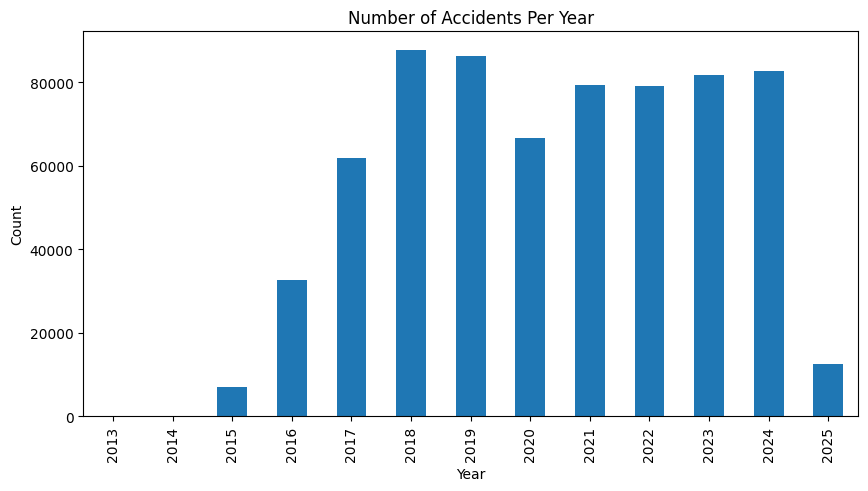

In [24]:
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Number of Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


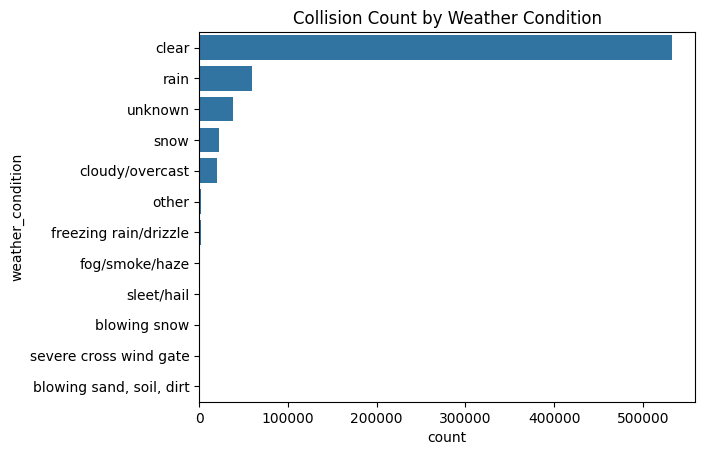

In [25]:
sns.countplot(y=df['weather_condition'], order=df['weather_condition'].value_counts().index)
plt.title('Collision Count by Weather Condition')
plt.show()


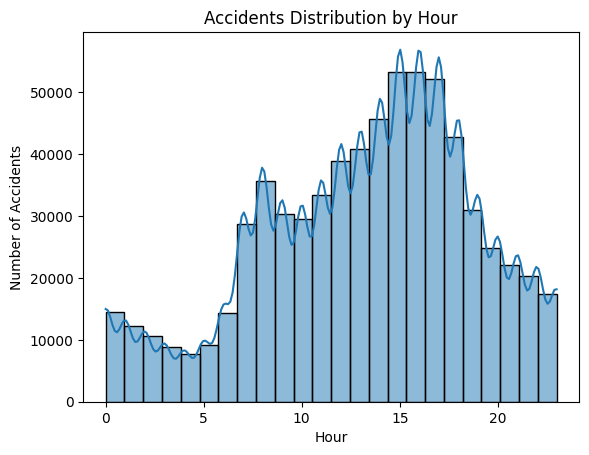

In [26]:
sns.histplot(df['hour'], bins=24, kde=True)
plt.title('Accidents Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


In [29]:
#Here i don't have road conditions so choose trafficway

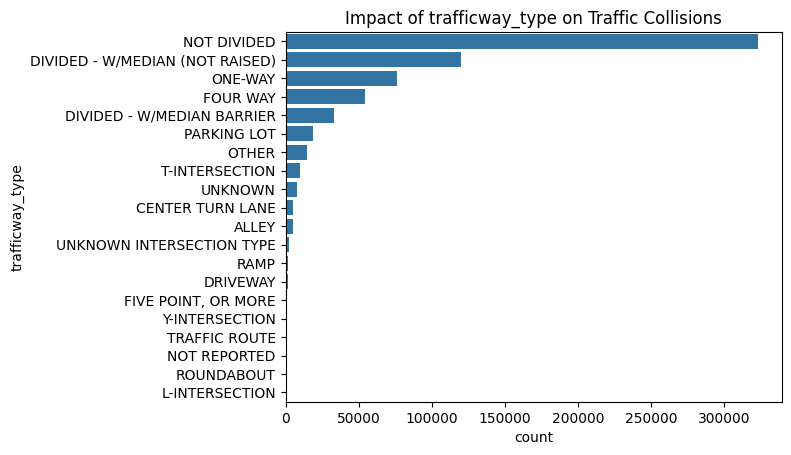

In [28]:
sns.countplot(y=df['trafficway_type'], order=df['trafficway_type'].value_counts().index)
plt.title('Impact of trafficway_type on Traffic Collisions')
plt.show()


In [30]:
df.to_csv("clean_chicago_traffic.csv", index=False)
